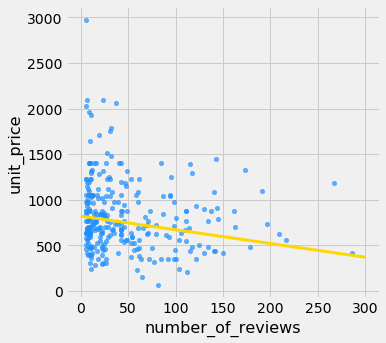

In [101]:
import copy

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# in this file, we are attempting to find the correlation betwee
# the unit price of an Airbnb and the number of reviews
# before the project, I believe that there should be a negative correlation
# since more reviews means more customers
# the host can lower the price to increase the quantity to optimize
unit_price_review = Table.read_table('unit_price.csv')

# there are roughly 9000 different Airbnb
# we just parse it by roughly 15, so 600 left
unit_price_review = unit_price_review.take(np.arange(0, unit_price_review.num_rows, 15))

unit_price_review = unit_price_review.with_column("week_price",unit_price_review.column("price")*7)

# we need to take out the outliers
def no_outliers(table, col):
    average = np.mean(table.column(col))
    std = np.std(table.column(col))
    # only need 1.2 standard deviations
    # this covers roughly 76 percent of the graph if we assume the graph is normal
    return table.where(col, are.between(average-1.2*std,average+1.2*std))

unit_price_review = no_outliers(unit_price_review, "week_price")

# we need to also get rid of the edge case where there are almost no reviews
unit_price_review = unit_price_review.where("number_of_reviews", are.above(5))


# generate a table with unit price
unit_price_review = unit_price_review.with_column("unit_price",
    unit_price_review.column("week_price")/unit_price_review.column("beds"))
graph = unit_price_review.scatter("number_of_reviews","unit_price", color="dodgerblue")

# use the standard_units to find the correlation
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

price_average = unit_price_review.column("unit_price").mean()
r = correlation(unit_price_review, "number_of_reviews", "unit_price")
plots.plot([0,300], [0*r+price_average, 3000*r+price_average], color='gold', lw=3)